In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
#import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix , accuracy_score

In [2]:
df = pd.read_csv('breast-cancer-data.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head().transpose()

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
diagnosis_le = LabelEncoder()
diagnosis_le.fit(df['diagnosis'])
df['diagnosis'] = diagnosis_le.transform(df['diagnosis'])

In [7]:
for col in df.columns:
    print(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


<AxesSubplot:>

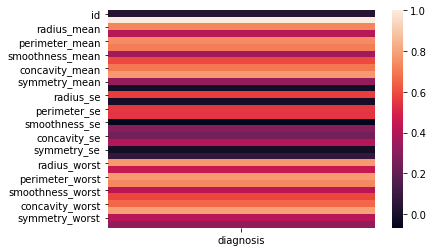

In [8]:
heatmap(df.corr().iloc[:,1:2])

>## cols: id, symmetry_se, fractal_dimension_se, fractal_dimension_mean, smoothness_se

<AxesSubplot:>

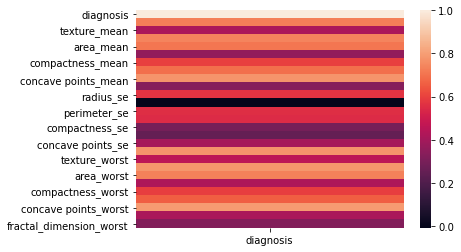

In [9]:
tmp_df = df.drop(['id',
                  'symmetry_se',
                  'fractal_dimension_se',
                  'fractal_dimension_mean',
                  'smoothness_se',
                  #'texture_se'
                 ], axis=1)
heatmap(tmp_df.corr().iloc[:,:1])

In [10]:
df_less = tmp_df
df_less.head().transpose()

,0,1,2,3,4
diagnosis,1.00000,1.00000,1.00000,1.00000,1.00000
radius_mean,17.99000,20.57000,19.69000,11.42000,20.29000
texture_mean,10.38000,17.77000,21.25000,20.38000,14.34000
perimeter_mean,122.80000,132.90000,130.00000,77.58000,135.10000
area_mean,1001.00000,1326.00000,1203.00000,386.10000,1297.00000
smoothness_mean,0.11840,0.08474,0.10960,0.14250,0.10030
compactness_mean,0.27760,0.07864,0.15990,0.28390,0.13280
concavity_mean,0.30010,0.08690,0.19740,0.24140,0.19800
concave points_mean,0.14710,0.07017,0.12790,0.10520,0.10430
symmetry_mean,0.24190,0.18120,0.20690,0.25970,0.18090


In [11]:
scaler = MinMaxScaler()
scaler.fit(df_less)
df_scaled = scaler.transform(df_less)

In [18]:
df_scaled = pd.DataFrame(data=df_scaled,
                         columns=df_less.columns)

In [19]:
df_scaled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [64]:
pca = PCA(n_components=0.99)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

trainX_pca, testX_pca, trainY_pca, testY_pca = train_test_split(df_pca[:,1:],
                                                        df.diagnosis,
                                                        random_state=9,
                                                        test_size=0.2)

model_RandFor_pca = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_RandFor_pca.fit(trainX_pca, trainY_pca)
y_pred_pca = model_RandFor_pca.predict(testX_pca)
accuracy_score(testY_pca, y_pred_pca)

0.868421052631579

In [66]:
df_pca.shape

(569, 14)